**Data Exploration and Preprocessing**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset .csv", encoding="latin-1")
df.head()



,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
print("No.of rows:", df.shape[0])
print("No.of columns:", df.shape[1])


No.of rows: 9551
No.of columns: 21


The dataset contains multiple rows representing restaurants and several columns describing their features such as location, cuisines, price range, and ratings.

In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿Restaurant ID      9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.isnull().sum()


,0
ï»¿Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
df['Aggregate rating'] = df['Aggregate rating'].fillna(df['Aggregate rating'].mean())



In [ ]:
df.isnull().sum()


,0
ï»¿Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [ ]:
df['Aggregate rating'].describe()


,Aggregate rating
count,9551.000000
mean,2.666370
std,1.516378
min,0.000000
25%,2.500000
50%,3.200000
75%,3.700000
max,4.900000


The aggregate rating is unevenly distributed across the dataset. Most restaurants have ratings concentrated in the mid-range, particularly between 2.5 and 4.0. In contrast, very low ratings (0–1) and very high ratings (above 4.5) occur much less frequently, indicating the presence of class imbalance in the target variable.

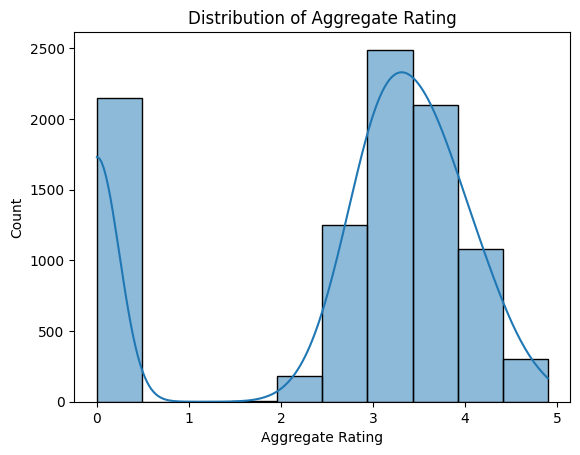

In [ ]:
plt.figure()
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Distribution of Aggregate Rating")
plt.show()


In [ ]:
df['Aggregate rating'].value_counts().sort_index()


,count
Aggregate rating,
0.0,2148
1.8,1
1.9,2
2.0,7
2.1,15
2.2,27
2.3,47
2.4,87
2.5,110


In this task, I explored the dataset to understand its structure and features. Missing values were identified and handled appropriately. Data types were checked and corrected where necessary. The target variable “Aggregate rating” shows an imbalanced distribution, with most restaurants falling in the mid-rating range.